In [1]:
import csv
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt

In [2]:
with open('tissue_cell_pairs.tsv', newline='') as file:
    reader = csv.reader(file, delimiter='\t')
    tissue_cells = list(reader)
print("number of cleaned cells:", len(tissue_cells))

cell_strs = []
for i in range(len(tissue_cells)):
  t,c = tissue_cells[i]
  cell_strs.append(t + " " + c)

number of cleaned cells: 219


In [3]:
with open('gene_list.csv', newline='') as file:
    reader = csv.reader(file, delimiter='\t')
    genes = list(reader)
print("number of cleaned genes:", len(genes))

number of cleaned genes: 964


In [4]:
# Write the cell-gene expression matrix
nTPM_matrix = []
with open('gene_expression_matrix.csv', newline='') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
      matrix_row = []
      for nTPM in row:
        matrix_row.append(float(nTPM))
      nTPM_matrix.append(matrix_row)
nTPM_matrix = np.array(nTPM_matrix)
m, n= nTPM_matrix.shape

print("The cleaned cell-gene expression matrix is size of " + str(m) + "x" + str(n))

The cleaned cell-gene expression matrix is size of 219x964


In [5]:
rec_markers = {}
rec_df = pd.read_csv('recommended_whole_body_markers.csv')
rec_df['markers'] = rec_df['markers'].apply(lambda x: ast.literal_eval(x))

[76, 93, 21, 14, 15]
219


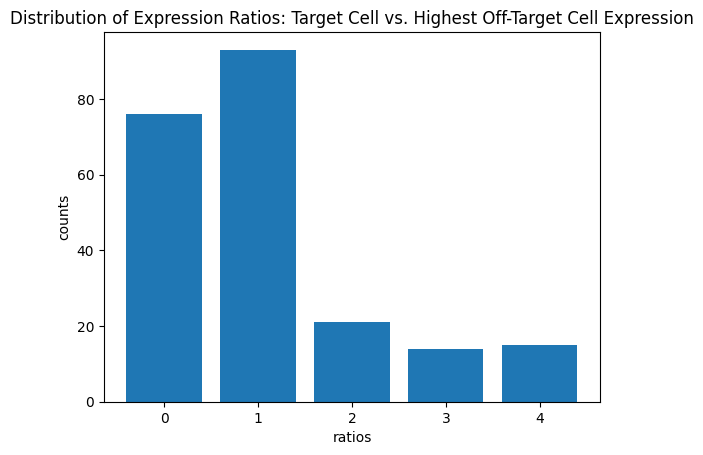

In [6]:
rec_markers = {}
rec_df = pd.read_csv('recommended_whole_body_markers.csv')
rec_df['markers'] = rec_df['markers'].apply(lambda x: ast.literal_eval(x))

top_markers = {}
for i in range(m):
  cell = rec_df.iloc[i, 0]
  cell_id = cell_strs.index(cell)
  markers = []
  for j in range(10):
    marker = rec_df.iloc[i, 1][j]
    marker_id = genes.index([marker])
    markers.append(marker_id)
  top_markers[cell_id] = markers

ratios = []
for i in top_markers:
  markers = top_markers[i]
  rati_com = []
  for marker_id in markers:
    # Find the max off target expression
    column_data = nTPM_matrix[:, marker_id].copy()
    column_data = np.delete(column_data, i)
    off_exp = np.max(column_data)
    # Find the target expression
    targ_exp = nTPM_matrix[i, marker_id]
    if off_exp == targ_exp and targ_exp == 0.0:
      rati_com.append(1)
    else:
      rati_com.append(targ_exp/off_exp)
  ratios.append(max(rati_com))

count1 = 0
count2 = 0
count3 = 0
count4 = 0
count0 = 0
for _ in ratios:
  if _ > 4:
    count4 += 1
  elif _ > 3:
    count3 += 1
  elif _ > 2:
    count2 += 1
  elif _ > 1:
    count1 += 1
  else:
    count0 += 1

print([count0, count1, count2, count3, count4])
print(len(ratios) )


plt.bar([0, 1, 2, 3, 4], [count0, count1, count2, count3, count4])
plt.xlabel('ratios')
plt.ylabel('counts')
plt.title('Distribution of Expression Ratios: Target Cell vs. Highest Off-Target Cell Expression')

plt.savefig('top10markers.svg', format='svg')

plt.show()

<ipython-input-7-10e0c27444e6>:24: RuntimeWarning: invalid value encountered in scalar divide
  ratios.append(targ_exp/off_exp)


[146, 50, 14, 2, 7]
219


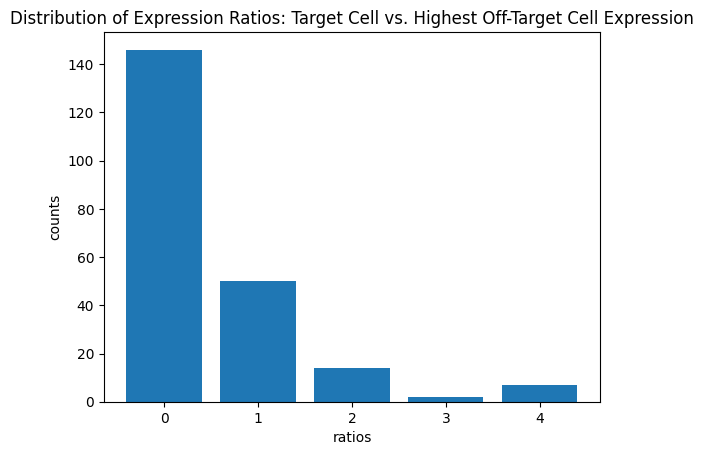

In [7]:
rec_markers = {}
rec_df = pd.read_csv('recommended_whole_body_markers.csv')
rec_df['markers'] = rec_df['markers'].apply(lambda x: ast.literal_eval(x))

top_markers = {}
for i in range(m):
  cell = rec_df.iloc[i, 0]
  cell_id = cell_strs.index(cell)
  marker = rec_df.iloc[i, 1][0]
  marker_id = genes.index([marker])
  top_markers[cell_id] = marker_id

ratios = []
for i in range(m):
  cell = rec_df.iloc[i, 0]
  cell_id = cell_strs.index(cell)
  marker_id = top_markers[cell_id]
  # Find the max off target expression
  column_data = nTPM_matrix[:, marker_id].copy()
  column_data = np.delete(column_data, i)
  off_exp = np.max(column_data)
  # Find the target expression
  targ_exp = nTPM_matrix[cell_id, marker_id]
  ratios.append(targ_exp/off_exp)

count1 = 0
count2 = 0
count3 = 0
count4 = 0
count0 = 0
for _ in ratios:
  if _ > 4:
    count4 += 1
  elif _ > 3:
    count3 += 1
  elif _ > 2:
    count2 += 1
  elif _ > 1:
    count1 += 1
  else:
    count0 += 1

print([count0, count1, count2, count3, count4])
print(len(ratios) )


plt.bar([0, 1, 2, 3, 4], [count0, count1, count2, count3, count4])
plt.xlabel('ratios')
plt.ylabel('counts')
plt.title('Distribution of Expression Ratios: Target Cell vs. Highest Off-Target Cell Expression')

plt.savefig('topmarker.svg', format='svg')

plt.show()

<ipython-input-8-b2bae1fba5ce>:30: RuntimeWarning: divide by zero encountered in scalar divide
  off_ratios.append(targ_exp2 / off_exp2)
<ipython-input-8-b2bae1fba5ce>:30: RuntimeWarning: invalid value encountered in scalar divide
  off_ratios.append(targ_exp2 / off_exp2)


[14, 32, 9, 101, 63]
219


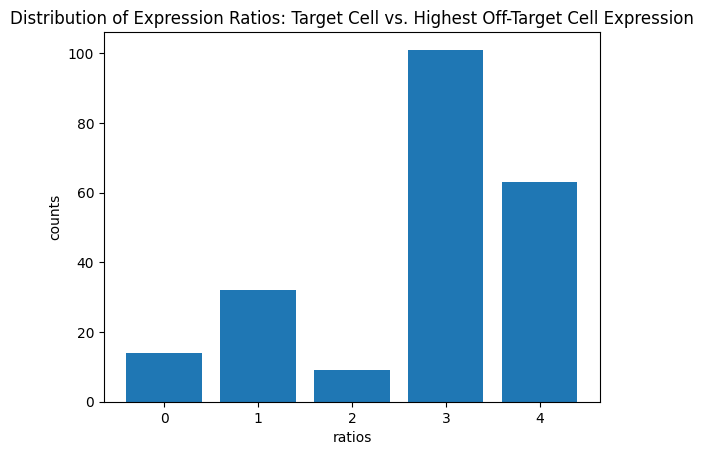

In [8]:
rec_markers = {}
rec_df = pd.read_csv('recommended_whole_body_markers.csv')
rec_df['markers'] = rec_df['markers'].apply(lambda x: ast.literal_eval(x))

top_markers = {}
for i in range(m):
  cell = rec_df.iloc[i, 0]
  cell_id = cell_strs.index(cell)
  marker1 = rec_df.iloc[i, 1][0]
  marker_id1 = genes.index([marker1])
  marker2 = rec_df.iloc[i, 1][1]
  marker_id2 = genes.index([marker2])
  top_markers[cell_id] = [marker_id1, marker_id2]

ratios = []
for i in range(m):
  cell = rec_df.iloc[i, 0]
  cell_id = cell_strs.index(cell)
  marker_id1, marker_id2 = top_markers[cell_id]
  # Find the target expression
  targ_exp1 = nTPM_matrix[cell_id, marker_id1]
  targ_exp2 = nTPM_matrix[cell_id, marker_id2]
  # Find the max off target expression
  column_data = nTPM_matrix[:, marker_id1]
  off_cells = np.where(column_data > targ_exp1)[0].tolist()
  off_ratios = []
  if off_cells != []:
    for off_cell in off_cells:
      off_exp2 = nTPM_matrix[off_cell, marker_id2]
      off_ratios.append(targ_exp2 / off_exp2)
    if off_ratios != []:
      if max(off_ratios) != np.inf:
        ratios.append(max(off_ratios))
      else:
        ratios.append(4)
    else:
      ratios.append(4)
  else:
        ratios.append(4)

count1 = 0
count2 = 0
count3 = 0
count4 = 0
count0 = 0
for _ in ratios:
  if _ > 4:
    count4 += 1
  elif _ > 3:
    count3 += 1
  elif _ > 2:
    count2 += 1
  elif _ > 1:
    count1 += 1
  else:
    count0 += 1

print([count0, count1, count2, count3, count4])
print(len(ratios) )


plt.bar([0, 1, 2, 3, 4], [count0, count1, count2, count3, count4])
plt.xlabel('ratios')
plt.ylabel('counts')
plt.title('Distribution of Expression Ratios: Target Cell vs. Highest Off-Target Cell Expression')

plt.savefig('top2markers.svg', format='svg')

plt.show()